In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 3s 1us/step


In [5]:
# Reshape to add channel dimension
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [6]:
trainY_cat = tf.keras.utils.to_categorical(y_train)
testY_cat = tf.keras.utils.to_categorical(y_test)

In [11]:
train_norm = x_train.astype('float32') / 255.0
test_norm = x_test.astype('float32') / 255.0

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


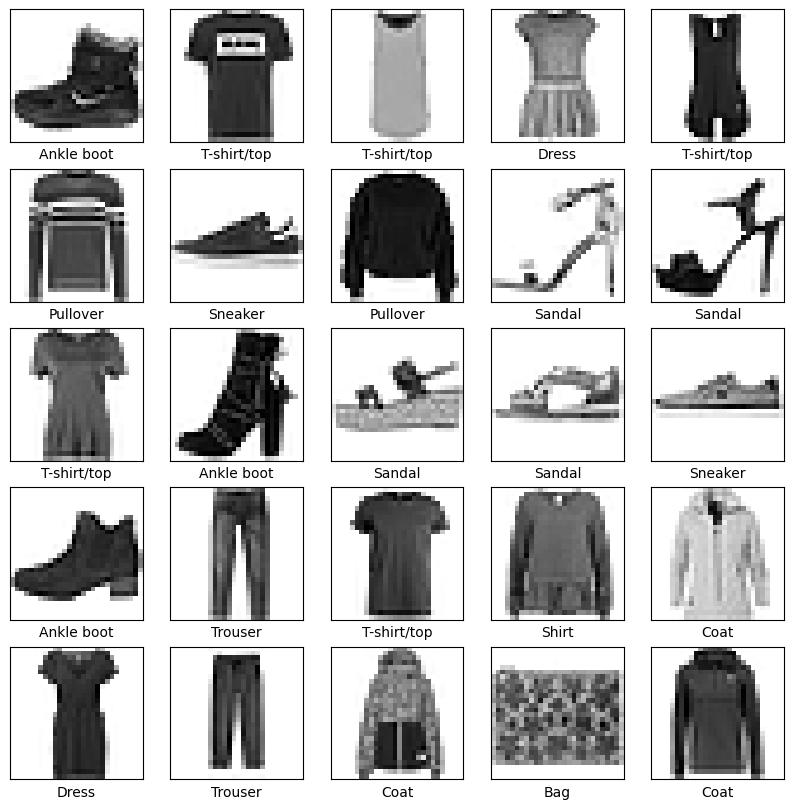

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.AvgPool2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.AvgPool2D((2, 2)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation="softmax")
])


In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, trainY_cat, epochs=10, validation_data=(x_test, testY_cat))


Epoch 1/10
1875/1875 [==============================] - 56s 29ms/step - loss: 0.9025 - accuracy: 0.6926 - val_loss: 0.6752 - val_accuracy: 0.7721
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.5600 - accuracy: 0.8041 - val_loss: 0.5101 - val_accuracy: 0.8260
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.4902 - accuracy: 0.8277 - val_loss: 0.5250 - val_accuracy: 0.8121
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.4466 - accuracy: 0.8419 - val_loss: 0.4540 - val_accuracy: 0.8377
Epoch 5/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.4149 - accuracy: 0.8526 - val_loss: 0.3996 - val_accuracy: 0.8601
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.3878 - accuracy: 0.8623 - val_loss: 0.3903 - val_accuracy: 0.8648
Epoch 7/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.3716 - accuracy: 0.8684 - val_loss: 0.4029 -

In [17]:
fig = plt.figure(figsize=(20, 8))
rows = 2
cols = 5
x = 1

for image, label in zip(images, labels):
    fig.add_subplot(rows, cols, x)
    
    # Prediction
    preds = model.predict(tf.expand_dims(image, axis=0))  # shape: (1, 10)
    pred_index = tf.argmax(preds[0]).numpy().item()
    label_index = tf.argmax(label).numpy().item()

    prediction = class_names[pred_index]
    label_name = class_names[label_index]

    plt.title(f"Label: {label_name}, Pred: {prediction}")
    plt.imshow(image / 255.0)
    plt.axis("off")
    x += 1

plt.show()

NameError: name 'images' is not defined

<Figure size 2000x800 with 0 Axes>

In [20]:
model.evaluate(x_test, testY_cat)
predictions = model.predict(x_test)
predictions = tf.argmax(predictions, axis=1)
y_test = tf.argmax(testY_cat, axis=1)


313/313 [==============================] - 3s 8ms/step


In [21]:
print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test, predictions, target_names=class_names))

Accuracy:  0.8694
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.85      0.83      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.75      0.87      0.81      1000
       Dress       0.85      0.88      0.86      1000
        Coat       0.70      0.84      0.76      1000
      Sandal       0.99      0.93      0.96      1000
       Shirt       0.82      0.47      0.60      1000
     Sneaker       0.88      0.99      0.93      1000
         Bag       0.99      0.95      0.97      1000
  Ankle boot       0.98      0.93      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



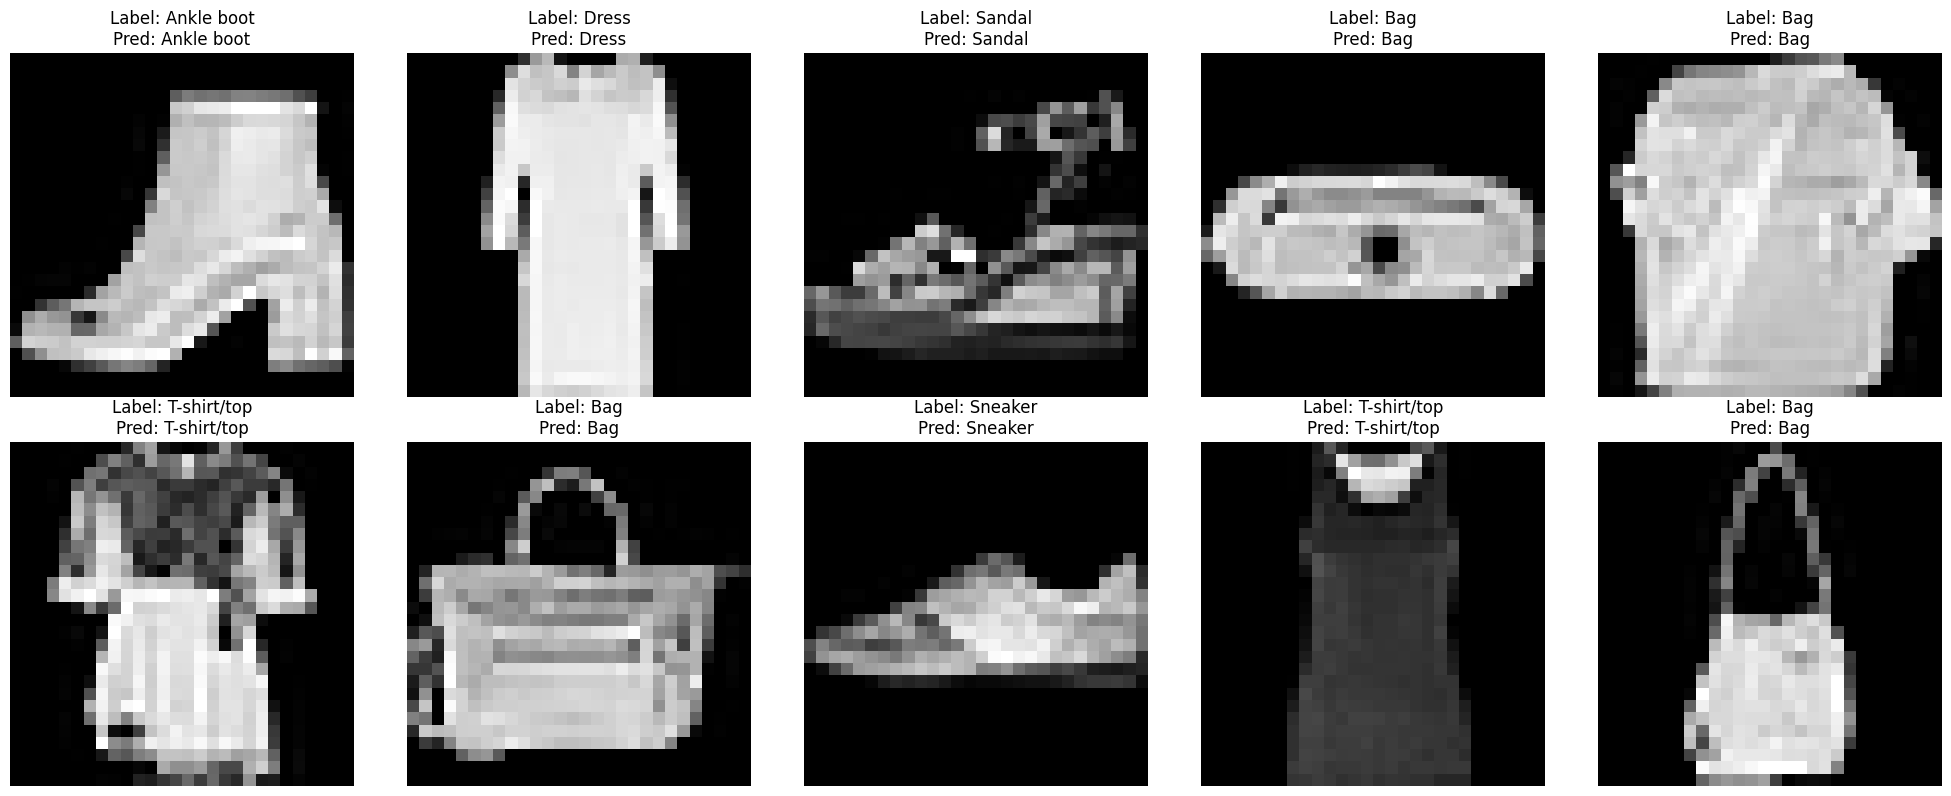

In [29]:
# Select 10 random test images
indices = np.random.choice(len(x_test), size=10, replace=False)
images = x_test[indices]
labels = y_test.numpy()[indices]


fig = plt.figure(figsize=(20, 8))
rows = 2
cols = 5
x = 1

for image, label in zip(images, labels):
    fig.add_subplot(rows, cols, x)

    # Predict
    preds = model.predict(tf.expand_dims(image, axis=0), verbose=0)
    pred_index = label
    prediction = class_names[pred_index]
    label_name = class_names[label]

    plt.title(f"Label: {label_name}\nPred: {prediction}")
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.axis("off")
    x += 1

plt.tight_layout()
plt.show()

